# PCA, Principal Component Analysis - 주성분 분석
고차원 데이터 집합이 주어졌을 때 원래의 고차원 데이터와 가장 비슷하면서 더 낮은 차원 데이터를 찾아내는 방법이다. **차원축소(dimension reduction)** 라고도 한다.  
더 낮은 차원의 데이터값 변화가 더 높은 차원의 데이터값 변화를 설명할 수 있다는 것은 얼핏 보기에 복잡해 보이는 **고차원 데이터의 변이를 몇 가지 원인으로 설명할 수 있다**는 뜻이다.

입력 차원이 너무 커서 학습이 진행이 잘 되지 않을때, 학습 데이터의 차원을 줄이는 방법으로 PCA를 사용할 수 있다.

PCA의 또 다른 이용 방법은 고차원 데이터의 차원을 줄여 시각화 할 때도 유용하게 사용된다.

PCA의 목적은 원 데이터(original data)의 분산을 최대한 보존하는 축을 찾아 투영(projection)하는 것이다.

* 고유벡터(eigenvector) : 기하학적으로 선형변환 A에 의해 방향은 보존되고 스케일(scale)만 변화되는 방향 벡터
* 고유값(eigenvalue) : 그 고유벡터의 변화되는 스케일 정도를 나타내는 값

![pca](https://github.com/aonekoda/reference/blob/main/images/pca.jpg?raw=true)

PCA를 수행하기 위해 임의의 3차원 데이터를 생성하고 이를 시각화해 본다.

In [1]:
import numpy as np

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print('X.shape:', X.shape)


X.shape: (60, 3)


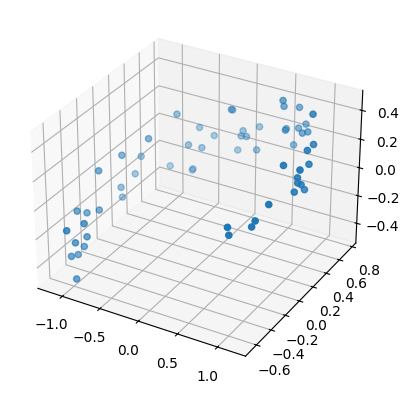

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()
#ax = fig.gca(projection='3d') # 버전상의 차이로 에러가 난다면...
ax = fig.add_subplot(projection='3d')

ax.scatter(X[:, 0],X[:, 1], X[:, 2])

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X)

,n_components,3
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [4]:
print('고유값(eigen value) :', pca.explained_variance_)  # 고유벡터로 사영했을때 분산
print('고유벡터(eigen vector) :\n', pca.components_)  # 분산이 최대화 되는 방향 벡터 고유벡터=주성분

고유값(eigen value) : [0.77830975 0.1351726  0.01034272]
고유벡터(eigen vector) :
 [[ 0.93636116  0.29854881  0.18465208]
 [-0.34027485  0.90119108  0.2684542 ]
 [-0.08626012 -0.31420255  0.94542898]]


### 적절한 차원 수 선택하기
* 원본의 차원과 같은 수의 주성분이 생성된다. 데이터의 정보 손실을 최소화하는 적절한 차원의 수를 선택한다.
* 'Explained Variance Ratio'를 이용해 축소할 차원의 수를 선택할 수 있다.
* 예를들어, 누적된 분산의 비율이 95%가 되는 주성분 축, 차원을 선택하는 것과 같은 방법

In [5]:
print('explained variance ratio :', pca.explained_variance_ratio_)

explained variance ratio : [0.84248607 0.14631839 0.01119554]


2개의 합이 전체 분산의 99%를 설명한다. 주성분의 갯수를 2로 한다.

In [6]:
#Scikit-Learn의 PCA에서는 n_components에 0 ~ 1사이의 값을 지정해 PCA 계산을 할 수 있다.

pca = PCA(n_components=2)
#pca.fit(X)
#X_proj = pca.transform(X)
X_proj = pca.fit_transform(X)

print('주성분 벡터 :\n', pca.components_)

print('원본 데이터:',X[0,:])
print('주성분 변환 데이터:',X_proj[0,:])

주성분 벡터 :
 [[ 0.93636116  0.29854881  0.18465208]
 [-0.34027485  0.90119108  0.2684542 ]]
원본 데이터: [-1.01570027 -0.55091331 -0.26132626]
주성분 변환 데이터: [-1.26203346 -0.42067648]


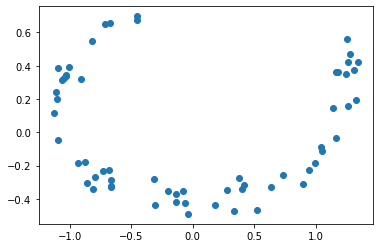

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X_proj[:,0], X_proj[:,1],'o')

### iris 데이터셋 PCA

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

iris = datasets.load_iris()

In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(iris.data)
X_iris = scaler.transform(iris.data)

In [ ]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=2).fit(X_iris)  # 주성분의 갯수를 2로

In [ ]:
# 주성분벡터는 components_ 속성에서 구할 수 있다.
pca1.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [ ]:
# 분산
pca1.explained_variance_

array([2.93808505, 0.9201649 ])

In [ ]:
# 분산 비율
pca1.explained_variance_ratio_

array([0.72962445, 0.22850762])

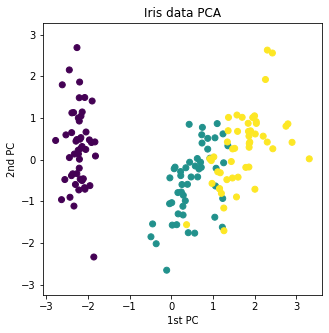

In [ ]:
X_low = pca1.transform(X_iris)  # 주성분을 적용하여 변환된 값
X2 = pca1.inverse_transform(X_low)  # 변환된 값을 주성분을 사용하여 다시 복원한 값

plt.figure(figsize=(5,5))
ax = plt.scatter(X_low[:,0], X_low[:,1], c=iris.target)

plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.title("Iris data PCA")
plt.axis("equal")
plt.show()

In [ ]:
#데이터의 평균값은 mean_ 속성으로 볼 수 있다.
pca1.mean_

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [ ]:
# 0번꽃, 주성분으로 계산된값, 주성분 벡터로 복원된 값
print('원본데이터 : ' , X_iris[0,:])
print('변환데이터 : ', X_low[0])
print('Inversed 데이터 : ', X2[0,:])

원본데이터 :  [-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
변환데이터 :  [-2.26470281  0.4800266 ]
Inversed 데이터 :  [-0.99888895  1.05319838 -1.30270654 -1.24709825]


# 유방암 데이터를 PCA로 차원 축소

유방암 데이터에는 악성 / 양성과 관련된 30개의 변수가 있다. 이것을 2차원으로 축소하여 시각화 해본다.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [ ]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지시킵니다
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만듭니다
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


['malignant' 'benign']


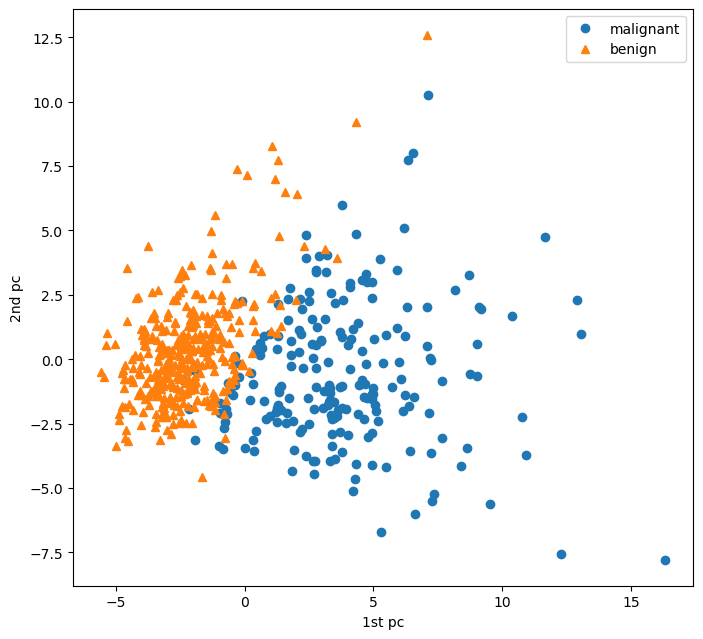

In [ ]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8, 8))
print(cancer.target_names)

m = X_pca[cancer.target==0]
b = X_pca[cancer.target==1]

plt.plot(m[:,0], m[:,1], 'o',label='malignant')
plt.plot(b[:,0], b[:,1], '^',label='benign')

plt.gca().set_aspect("equal")
plt.xlabel("1st pc")
plt.ylabel("2nd pc")
plt.legend()
plt.show()

In [ ]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

Text(0, 0.5, 'pc')

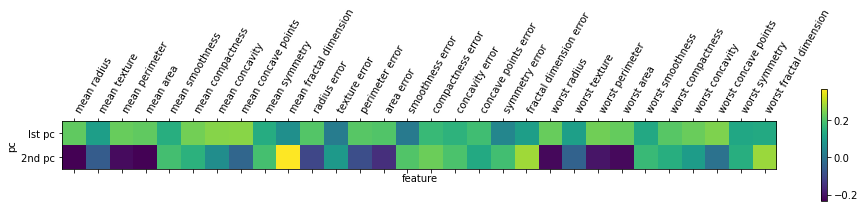

In [ ]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["lst pc", "2nd pc"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("feature")
plt.ylabel("pc")

## 실습하기
1. sklearn의 wine 데이터를 다음과 같이 읽어들이시오.
```
from sklearn.datasets import load_wine
data = load_wine()
x = data.data
y = data.target
```

2. 읽어들인 데이터에 대해서 스케일링을 수행하시오.
3. PCA를 사용하여 2차원을 차원축소하고 결과를 산점도로 그려보시오.

In [7]:
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

# Data Scaling
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

X_train_std_scaled = std_scaler.fit_transform(X_train)
X_train_mm_scaled = mm_scaler.fit_transform(X_train)


In [10]:
# PCA 2-dimensional
pca = PCA(n_components=2)
pca_std = pca.fit(X_train_std_scaled)
pca_mm = pca.fit(X_train_mm_scaled)

# PCA Fit at different scaling

X_pca_std = pca_std.transform(X_train_std_scaled)
X_pca_mm = pca_mm.transform(X_train_mm_scaled)

print("Standard Scaling 원본 데이터 형태: {}".format(str(X_train_std_scaled.shape)))
print("Standard Scaling 축소된 데이터 형태: {}".format(str(X_pca_std.shape)))

print("MinMax Scaling 원본 데이터 형태: {}".format(str(X_train_mm_scaled.shape)))
print("MinMax Scaling 축소된 데이터 형태: {}".format(str(X_pca_mm.shape)))


Standard Scaling 원본 데이터 형태: (124, 13)
Standard Scaling 축소된 데이터 형태: (124, 2)
MinMax Scaling 원본 데이터 형태: (124, 13)
MinMax Scaling 축소된 데이터 형태: (124, 2)
